## Import Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

## Load the data

In [ ]:
heart_data  = pd.read_csv("Training_set_heart.csv" )

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


## Perform Basic Exploratory Data Analysis

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
 13  target    212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.3 KB


In [ ]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,54.561321,0.688679,0.915094,132.127358,247.830189,0.165094,0.537736,148.995283,0.330189,1.008491,1.448113,0.783019,2.320755,0.542453
std,9.493376,0.464130,1.008193,17.440700,53.199877,0.372144,0.527437,23.332645,0.471394,1.141681,0.601850,1.066551,0.646495,0.499374
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.750000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,57.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,151.500000,0.000000,0.650000,2.000000,0.000000,2.000000,1.000000
75%,61.250000,1.000000,2.000000,140.000000,277.000000,0.000000,1.000000,165.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


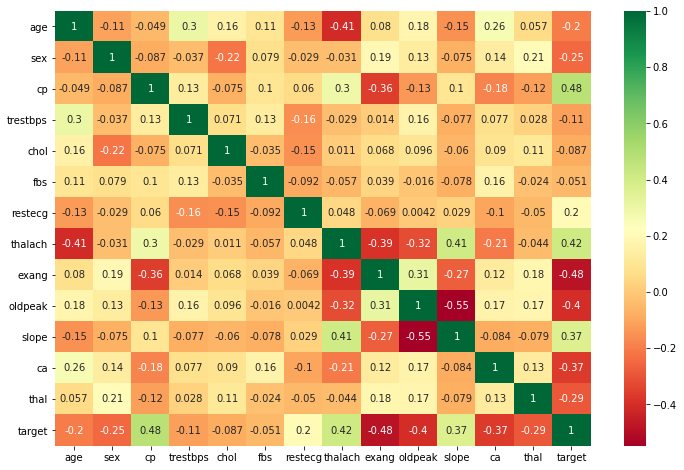

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
corr_matrix = heart_data.corr()
sns.heatmap(data=corr_matrix, annot=True, cmap="RdYlGn")

In [ ]:
corr_matrix['target'].sort_values(ascending=False)

target      1.000000
cp          0.477865
thalach     0.417547
slope       0.370050
restecg     0.200817
fbs        -0.050644
chol       -0.086962
trestbps   -0.114081
age        -0.201492
sex        -0.249428
thal       -0.291939
ca         -0.365253
oldpeak    -0.398818
exang      -0.482622
Name: target, dtype: float64

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


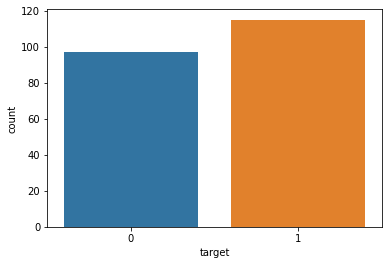

In [ ]:
sns.countplot(heart_data.target)
plt.show()

In [ ]:
data = heart_data.drop('target', axis=1)
labels = heart_data.target
data.shape, labels.shape

((212, 13), (212,))

## Split the data into Train and Test Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
X_train.head(3)

(169, 13) (43, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
16,58,1,0,150,270,0,0,111,1,0.8,2,0,3
135,50,0,0,110,254,0,0,159,0,0.0,2,0,2
122,52,1,0,112,230,0,1,160,0,0.0,2,1,2


## Build a Logistic Regression Model on train set

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(solver='liblinear', max_iter=100, verbose=2)

In [ ]:
log_model.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=2,
                   warm_start=False)

In [ ]:
predictions = log_model.predict(X_test)

## Evaluate the model using F1 Score

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions, average='macro')

0.8313725490196078

##  Use a SHAP Explainer to derive SHAP Values for the logistic regression model.

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
explainer = shap.LinearExplainer(log_model, X_train)
shap_values = explainer.shap_values(X_test)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [ ]:
print('Expected Value:', explainer.expected_value)

Expected Value: 0.3024648527689445


the expected value shown here is the base value. Which will be used to reason why some examples have prediction 1 and some have 0

In [ ]:
pd.DataFrame(shap_values, columns=X_test.columns).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.076820,-0.237770,1.131123,-0.265062,-0.006767,-0.034664,-0.519053,0.480047,0.45182,0.392830,0.266424,0.315202,0.326566
1,-0.021165,0.529231,1.131123,0.041368,-0.005933,0.003428,-0.519053,-1.127612,0.45182,0.392830,0.266424,0.315202,2.745578
2,0.018029,0.529231,0.156017,-0.060775,0.015084,0.003428,0.318129,0.512200,0.45182,-0.268314,0.266424,0.315202,0.326566
3,-0.256328,-0.237770,0.156017,0.501013,-0.002764,0.003428,0.318129,0.094209,0.45182,0.392830,0.266424,0.315202,0.326566
4,0.194402,-0.237770,2.106229,-1.031136,-0.004098,0.003428,-0.519053,0.158515,0.45182,0.062258,-0.300436,0.315202,-0.882939


This returns a matrix of SHAP values (# samples, # features). Each row sums to the difference between the model output for that sample and the expected value of the model output (which is stored as expected_value attribute of the explainer).

## Plot a SHAP force plot for the first row of test data.

In [ ]:
y_test.iloc[0], predictions[0]

(1, 1)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values[0,:], X_test.iloc[0,:])

**Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue**  
*The values above the base value will be put into class 1 wheras the values below it will be put into class 0.*

We can see from above visualization that the features contributed in making the output greater than base value were cp, thalach, exang which means that features like presence of chest pain type 2 and higher maximum heart rate led the model to predict that the patient is likely to have heart disease despite having some features like Resting blood pressure and Resting electrocardiographic results outputs which reduced the output a little.

## Plot a SHAP force plot for all the rows of the data

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values, X_test)

The above visualization can be interacted with in multiple ways using the drop down boxes.  

The default visualization(sample order by similarity i.e putting the examples having the most similar features together)  

- Test samples from 1 to 8 shows most of the samples with predicting presence of heart disease having features like chest pain(cp) type 2 or 3 and having Exercise induced angina(exang)  
- Test samples from 8 to 17 shows less predicted outputs means not predicting heart disease having various features like lower Maximum heart rate achieved(thalach), chest pain type 0, thal = 3(reversible defect found) and higher ST depression induced by exercise relative to rest(oldpeak)
- Similarly in samples 23-29 similar trend in features like chest pain type 0, high oldpeak etc led to prediction = 0  
- From samples 29 to remaining 12-13 samples have prediction of presence of heart disease due diverse patterns but dominant featuers like chest pain(cp) type 2 or 3 and having Exercise induced angina(exang), and than feature having, fixed defect found and even normal blood flow

## Plot a SHAP summary plot using all the features in the data

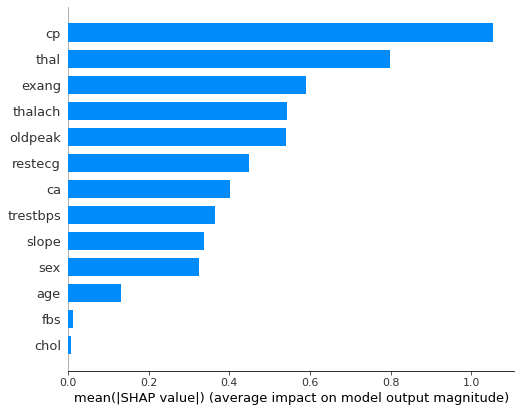

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

From the above simple bar chart, we observe that chest pain type and blood flow defect are the top 2 important features while determining the prediction of heart disease.

On the other hand, age, serum cholesterol, fasting blood sugar levels are the least important features while predicting.

## Plot a dependence plot to show the effect of ‘chol’ across the whole dataset.

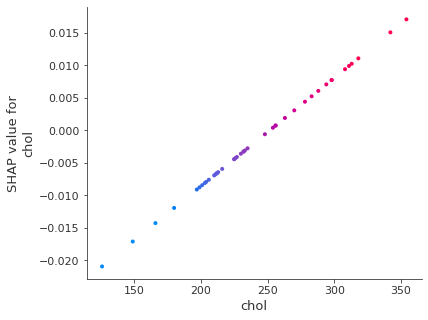

In [ ]:
shap.initjs()
shap.dependence_plot(ind='chol', interaction_index='chol',
                     shap_values=shap_values, 
                     features=X_test)

Serum cholesterol seems to have linear dependence on shap values that means higher level of serum cholestrol links to higher chances of having a heart disease.

## Two-way PDP showing interactions between features 'Resting blood pressure' and ‘Chest pain type’ and their effect

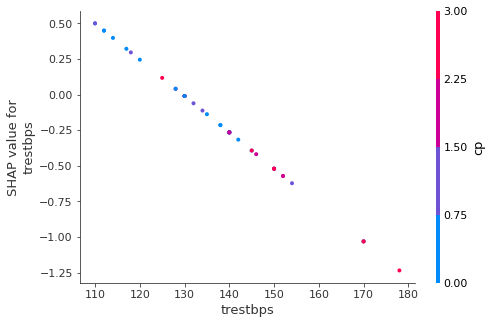

In [ ]:
shap.initjs()
shap.dependence_plot(ind='trestbps', interaction_index='cp',
                     shap_values=shap_values, 
                     features=X_test)

`Above plot shows that lower Resting blood pressure and chest pain type 1 or 2 are having higher shap values leading to higher chances of having heart disease in patient`